## Part 8. Data Assimilation
$$ \def\pr{\hbox{Pr}}
\def\var{\hbox{var}}
\def\cov{\hbox{cov}}
\def\tr{\hbox{tr}}
\def\corr{\hbox{corr}}
\def\dmX{\un{\mathcal{X}}}
\def\dmG{\un{\mathcal{G}}}
\def\dmK{\un{\mathcal{K}}}
\def\dmS{\un{\mathcal{S}}}
\def\dmC{\un{\mathcal{C}}}
\def\dmZ{\un{\mathcal{Z}}}
\def\bma{{\mbox{\boldmath $\alpha$}}}
\def\bmb{{\mbox{\boldmath $\beta$}}}
\def\bmu{{\mbox{\boldmath $\mu$}}}
\def\bme{{\mbox{\boldmath $\epsilon$}}}
\def\bmS{{\mbox{\boldmath $\Sigma$}}}
\def\bmL{{\mbox{\boldmath $\Lambda$}}}
\def\bmd{{\mbox{\boldmath $\delta$}}}
\def\bmD{{\mbox{\boldmath $\Delta$}}}
\def\bmG{{\mbox{\boldmath $\Gamma$}}}
\def\bmphi{{\mbox{\boldmath $\phi$}}}
\def\bmPhi{{\mbox{\boldmath $\Phi$}}}
\def\bmpsi{{\mbox{\boldmath $\psi$}}}
\def\bmtheta{{\mbox{\boldmath $\theta$}}}
\def\eq{\begin{equation}}
\def\eeq{\end{equation}}
\def\i{{\bf i}}
\def\un#1{{\bf #1}}$$


<a href="https://people.eecs.berkeley.edu/~pabbeel/cs287-fa12/optreadings/Arulampalam_etal_2002.pdf ">Arulampalam, M. S., Maskell, S., Gordon, N., and Clapp, T. (2002).
 A tutotial on particle filters for online nonlinear/non-Gaussian
  Bayesian tracking.
IEEE Transactions on Signal Processing, (50)(2), 174--188.</a>

<a href="http://www.springer.com/us/book/9780387310732">Bishop, C. M. (2006).
Pattern Recognition and Machine Learning, Springer.</a>

<a href="http://onlinelibrary.wiley.com/doi/10.1034/j.1600-0870.1999.t01-2-00002.x/abstract">
Miller, R. N., Carter, E. F., and Blue, S. T. (1999).
Data assimilation into nonlinear stochastic models.
Tellus, 51A, 167--194.</a>

Nonlinear system model (first-order Markov process):

$$
z_n = f(z_{n-1},w_n),\quad w_n=\hbox{system noise}.\tag 1
$$

Nonlinear measurement model:

$$
x_n = h(z_n, v_n),\quad v_n=\hbox{measurement noise}.\tag 2
$$

Given observations $X_n = (x_1,x_2\dots x_n)$ we want to estimate the posterior probability
density function
$p(z_n\mid X_n)$ for observing $z_n$. Then the state $z_n$ can be estimated:

$$
\hat z_n = \int z_np(z_n\mid X_n)dz_n, \quad \var(z_n) = \int (z_n-\hat z_n)^2 p(z_n\mid X_n)dz_n.\tag 3
$$

If the data $x_n$ arrive sequentially, we can write (3) as

$$
\hat z_n = \int z_np(z_n\mid x_n,X_{n-1})dz_n\tag 4
$$

and say that $x_n$ is being "assimilated" to get a better estimate of the state variable $z_n$.

we make use of

$$\eqalign{
p(a\mid b,c) &\propto p(b,c\mid a)p(a)\quad\quad\quad\quad\hbox{(Bayes)}\cr
&= p(b\mid c,a)p(c\mid a)p(a)\quad\hbox{(Product rule)}\cr
&\propto p(b\mid c,a)p(a\mid c)\quad\quad\quad\hbox{(Bayes again)},
}
$$

so that

$$
p(a\mid b,c) ={p(b\mid c,a)p(a\mid c)\over \int p(b\mid c,a)p(a\mid c)da}.\tag 5
$$

Rewriting (4) with the help of (5) and $a = z_n,\ b=x_n,\ c=X_{n-1}$,

$$
\hat z_n = {\int z_n p(x_n\mid X_{n-1},z_n)p(z_n\mid X_{n-1})dz_n\over
\int p(x_n\mid X_{n-1},z_n)p(z_n\mid X_{n-1})dz_n}.\tag 6
$$

But $x_n$ is conditionally independent of $X_{n-1}$ so we get

$$
\hat z_n = {\int z_n p(x_n\mid z_n)p(z_n\mid X_{n-1})dz_n\over
\int p(x_n\mid z_n)p(z_n\mid X_{n-1})dz_n}.\tag 7
$$

Now suppose that we have a set $\{z_n^i\}_1^N$ of $N$ samples drawn from the
posterior PDF $p(z_n\mid X_{n-1})$ at time $n$, i.e.,

$$
p(z_n\mid X_{n-1}) \approx \sum_{i=1}^N\delta(z_n-z_n^i).\tag 8
$$

We measure $x_n$. Then we can assimilate $x_n$ to get a better current estimate
of $z_n$ by substituting (8) into (7). This gives

$$
\hat z_n =\int z_np(z_n\mid X_n)dz_n \approx \sum_{i=1}^N z_n^i {p(x_n\mid z_n^i)\over\sum_{j=1}^Np(x_n\mid z_n^j)} = \sum_{i=1}^N z_n^i w_n^i,\tag 9
$$

where the weights $w_i$ are given by the likelihoods $p(x_n\mid z_n^i)$ for observing $x_n$
given the model states $z_n^i$,

$$
w_n^i = {p(x_n\mid z_n^i)\over\sum_{j=1}^Np(x_n\mid z_n^j)}.\tag{10}
$$

The *effective number of particles* involved in (9) is 

$$
N_{eff} = {1 \over \sum_i^N (w_n^i)^2}.
$$

For example, if all of the weights are equal then $w_n^i = 1/N$ and we get

$$
N_{eff} = {1 \over N\cdot(1/N^2)} = N.
$$

Next we observe $x_{n+1}$. Now we must sample from $p(z_{n+1}\mid X_n)$.
Using Bayes Rule as above, we get

$$\eqalign{
p(z_{n+1}\mid X_n)
={\int p(z_{n+1}\mid z_n) p(x_n\mid z_n)p(z_n\mid X_{n-1})dz_n\over
\int p(x_n\mid z_n)p(z_n\mid X_{n-1})dz_n}.}\tag{11}
$$

**Exercise 1:** Show this.


Now substitute (8) into (10) to get

$$
p(z_{n+1}\mid X_n) = \sum_{i=1}^N w_n^i p(z_{n+1}\mid z_n^i).
$$

So to go to the next step: for $i=1\dots N$,
choose PDF $p(z_{n+1}\mid z_n^i)$ with probability $w_n^i$
and use the model Equation (1) to sample from that PDF. Combine the weighted samples to get $\{z_{n+1}^i\}_i^N$.
Then use (9) and (10) with $n\to n+1$ to assimilate $x_{n+1}$, etc.

**Algorithm (Nonlinear Bayesian Tracking or Particle Filter):**

1) Initialize $n=1$ , $\{z_n^i\}_1^N$.

2) Measure $x_n$ and calculate weights $w_n^i = p(x_n\mid z_n^i)$, $i=1\dots N$ from measurement model (1). Set $w_n^i = w_n^i  / \sum_i w_n^i$.

3) Calcultate $N_{eff} = \sum_i 1/(w_n^i)^2$ and re-sample the $z_n^i$ if too small.

4) Calculate $\hat z_n = \sum_1^N z_n^i w_n^i,\quad \var(z_n) = \sum_1^N (z_n^i-\hat z_n)^2 w_n^i$.

5) Sample $p(z_{n+1}\mid z_n^i)$ from system model (2)  with weights $w_n^i$ to get $\{z_{n+1}^i\}_1^N$.

6) Set n = n+1 and go to 2).

### SImulation

Following Miller et al.(1999) we use as system model, Equation (1), the stochastic Lorenz equations for the state vector $\un Z=(Z_0,Z_1.Z_2)^\top$

$$\eqalign{
{dZ_0\over dt} &= \sigma(Z_1-Z_0) + w_0\cr
{dZ_1\over dt} &= \rho Z_0 - Z_1 -Z_0Z_2 + w_1\cr
{dZ_2\over dt} &= Z_0Z_1-\beta Z_2 + w_2,
}
$$

with $\sigma=10,\ \rho=28,\ \beta=8/3$ and $w_i \sim N\left(0,0.5\right)$, $i=0\dots 2$. This
model is highly nonlinear and, for the choice of parameters, chaotic.


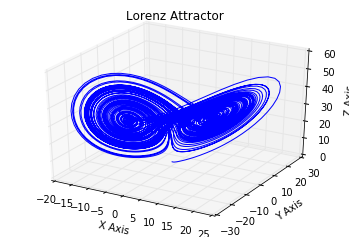

In [1]:
%matplotlib inline
%run /home/mort/stats2016/lorenz

We run the model over the time interval $[0,45]$, simulating
measurements $\un X=(X_0,X_1,X_2)^\top$ of all three state variables every 0.48 time units with uncorrelated Gaussian error noise. The measurement variance-covariance
matrix is

$$
{\bf\Sigma}_v = \pmatrix{2 & 0 & 0\cr
                  0 & 2 & 0\cr
                  0 & 0 & 2}.
$$

Then we restart the model and simulate the assimilation of the measurements using the particle filter described above.
The number of particles (samples) is $N=4000$, and resampling is done when $N_{eff} < 3000$.

**show simulation in IDL**